### Procesos de Poisson

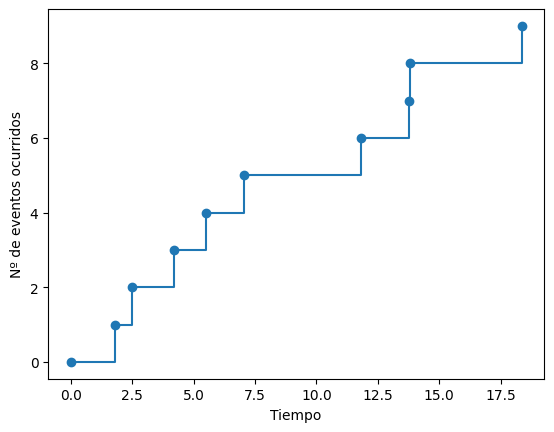

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def poisson_process(rate, n_events):
    time_intervals = -np.log(np.random.random(n_events)) / rate
    times = time_intervals.cumsum()
    events = np.arange(n_events)
    times = times - min(times) # Para comenzar en 0
    return times, events


times, events = poisson_process(1,10)
plt.plot(times, events, marker = 'o', drawstyle ='steps-post')
plt.xlabel('Tiempo')
plt.ylabel('Nº de eventos ocurridos')
plt.show()

### Código 
$\pi$ ola

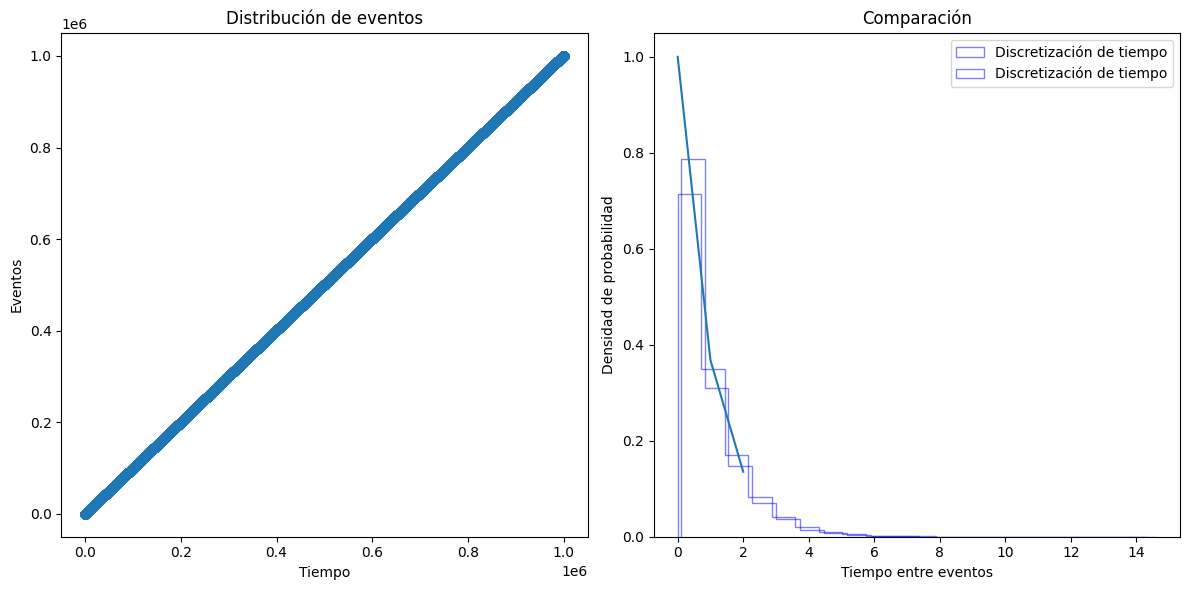

In [3]:
def poisson_process_discrete(rate, total_time, n_intervals):
    dt = total_time / n_intervals
    probabilities = np.random.uniform(size=n_intervals)
    #arrival_times= []
    """for i in range(len(probabilities)):
        if probabilities[i] < rate*dt:
            arrival_times.append(i*dt)"""
    arrival_times = [i * dt for i in range(n_intervals) if probabilities[i] < rate * dt] # Así también vale, no sé cual es más rápido

    return np.array(arrival_times)

# Damos valores a los parámetros

rate = 1
total_time = 10**6
n_intervals = total_time*10

# Obtenemos los tiempos de los eventos
arrival_times_discrete = poisson_process_discrete(rate, total_time, n_intervals)
# Le restamos el mínimo para empezar en 0
arrival_times_discrete = arrival_times_discrete-min(arrival_times_discrete)

# Obtenemos tiempos entre eventos
t_events = np.diff(arrival_times_discrete)

# Calculamos tiempos con distribución exponencial
exponential_times = np.random.exponential(scale=1/rate, size = len(t_events))

fig = plt.figure(figsize=(12, 6))
axgrid = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(arrival_times_discrete, np.arange(len(arrival_times_discrete)), marker = 'o', drawstyle = 'steps-post')
ax0.set_title('Distribución de eventos')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('Eventos')

ax1 = fig.add_subplot(axgrid[0,1])
#ax1.plot(np.sort(exponential_times), rate * np.exp(-rate * np.sort(exponential_times)), color='r', label='Distribución exponencial')
ax1.hist(t_events, bins=20, density=True, alpha=0.5, color='blue', label='Discretización de tiempo', histtype='step')
ax1.hist(exponential_times, bins=20, density=True, alpha=0.5, color='red', label='Discretización de tiempo', histtype='step')
ax1.plot(np.arange(0,3/rate), np.exp(-rate*np.arange(0,3/rate)))
ax1.set_title('Comparación')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

fig.tight_layout()


### Procesos de Hawkes


ValueError: Integers to negative integer powers are not allowed.

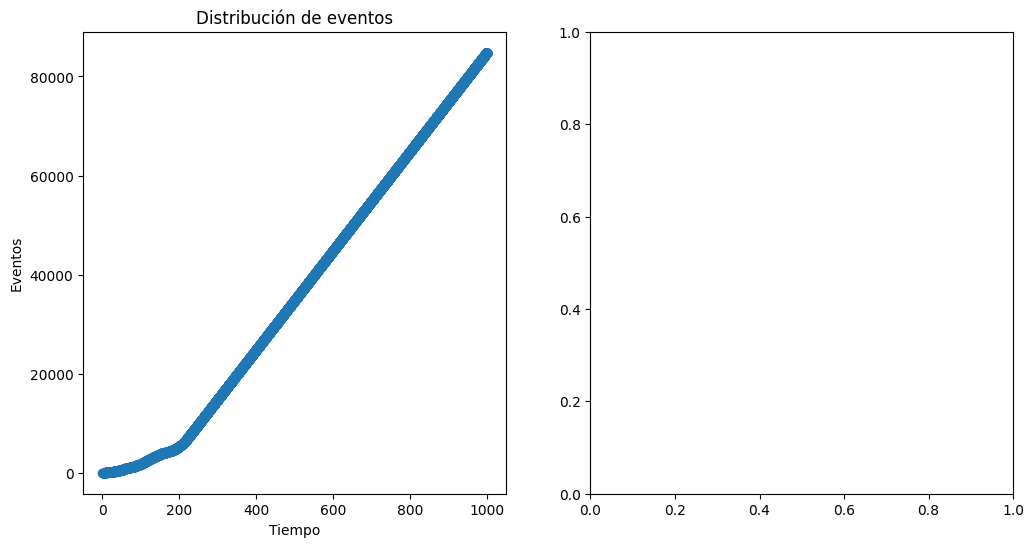

In [19]:
def algorithm(rate, mu, n, t_prev):
    """
    Algoritmo que calcula el tiempo enre eventos en un proceso de Hawkes

    #Output: rate x_k, x_k
    """
    #Paso 1
    u1 = np.random.uniform()
    F1 = -np.log(u1) / mu

    #Paso 2
    u2 = np.random.uniform()
    G2 = 1 + np.log(u2)/ (rate(t_prev)-mu)

    #Paso 3
    if G2 <= 0:
        F2 = np.inf()
    else:
        F2 = -np.log(G2)

    #Paso 4
    xk = np.min(F1,F2)

    #Paso 5
    rate_tk = (rate(t_prev)-mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

def hawkes_process_discrete(total_time, n_intervals):
    mu = 1.
    n = 1
    rate = mu
    
    dt = total_time / n_intervals
    probabilities = np.random.uniform(size=n_intervals)
    arrival_times= np.array(0.)
    #phi = [] 
    for i in range(len(probabilities)):
        rate = mu +n * np.sum(np.exp(arrival_times-i*dt))
        if probabilities[i] < rate*dt:
            arrival_times = np.append(arrival_times,i*dt)
            #phi.append(np.exp(-arrival_times[i]))
            #rate += n * np.exp(-arrival_times[-1])

    return arrival_times


# Damos valores a los parámetros
total_time = 10**3
n_intervals = total_time*100

# Obtenemos los tiempos de los eventos
arrival_times_discrete = hawkes_process_discrete(total_time, n_intervals)
# Le restamos el mínimo para empezar en 0
#arrival_times_discrete = arrival_times_discrete-min(arrival_times_discrete)    No hace falta en principio, podemos añadir nosotros un evento en t=0 sin
#modificar la estadística

# Obtenemos tiempos entre eventos
t_events = np.diff(arrival_times_discrete)

# Calculamos tiempos con distribución exponencial
#exponential_times = np.random.exponential(scale=1/0.01, size = len(t_events))  #No tiene mucho sentido esta comparación

fig = plt.figure(figsize=(12, 6))
axgrid = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(arrival_times_discrete, np.arange(len(arrival_times_discrete)), marker = 'o', drawstyle = 'steps-post')
ax0.set_title('Distribución de eventos')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('Eventos')

ax1 = fig.add_subplot(axgrid[0,1])
#ax1.plot(np.sort(exponential_times), 0.01 * np.exp(-0.01 * np.sort(exponential_times)), color='r', label='Distribución exponencial con $\lambda=\mu=0.01$')
ax1.plot(np.arange(0,10), np.power(np.arange(0,10),-2), label = '1/x')
ax1.hist(t_events, bins=1000, density=True, alpha=0.5, color='blue', label='Discretización de tiempo', histtype='step' )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Comparación')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

fig.tight_layout()
#fig.show()

Mirar como se distribuyen los tiempos de procesos de Hawkes por internet e intentar mirar cómo se hace de manera "exacta" como en el artículo. 
Intentar mejorar el método aproximado y mirar la referencia para entender el algoritmo.

Una vez obtenida la serie temporal, discretizarla en función de la resolución ($\Delta$) y ver como cambia la $P_{\infty}=\dfrac{n_{events}(maxcluster)}{n_{events}}$